In [1]:
# Import requests for web scraping
import pandas as pd
import numpy as np
import requests as rq
import collections

# Matplotlib and associated plotting
import matplotlib.cm as cm
import matplotlib.colors as colors 

import matplotlib as mpl
import matplotlib.pyplot as plt

# Importk-means from clustering stage
from PIL import Image
from matplotlib import rcParams 

In [18]:
#URL = 'https://lopezobrador.org.mx/2020/04/05/discurso-del-presidente-andres-manuel-lopez-obrador-en-su-informe-al-pueblo-de-mexico/'
#website_url = rq.get(URL)

In [85]:
# importing required modules 
import PyPDF2 
    
# creating a pdf file object 
pdfFileObj = open('mensaje_2.pdf', 'rb') 
    
# creating a pdf reader object 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
    
# printing number of pages in pdf file 
pdfReader.numPages

page1 = pdfReader.getPage(0) 
page2 = pdfReader.getPage(1)
page3 = pdfReader.getPage(2)
page4 = pdfReader.getPage(3)

total_text = page1.extractText() + page2.extractText() + page3.extractText() + page4.extractText()
pdfFileObj.close()

In [14]:
# Todo el text del HTML esta en la variable
#type(website_url.text)

str

In [86]:
# Import BeautifulSoup from html structure information from requests
# Limpiara todo el string de keywords
from bs4 import BeautifulSoup
soup = BeautifulSoup(total_text,'lxml')

data = [element.text for element in soup.find_all('p')] #Restricting text from 'p' founds
data = str(data) #Convert to String
type(data)

str

In [87]:
data = data.replace('\\n', '')

In [ ]:
#!pip install stop-words

In [88]:
from stop_words import get_stop_words # The word we want to ignore

stop_word_es = get_stop_words('es') # Spanish Stopwords

In [89]:
for i in stop_word_es:
    print(i, end=",")

a,al,algo,algunas,algunos,ante,antes,como,con,contra,cual,cuando,de,del,desde,donde,durante,e,el,ella,ellas,ellos,en,entre,era,erais,eran,eras,eres,es,esa,esas,ese,eso,esos,esta,estaba,estabais,estaban,estabas,estad,estada,estadas,estado,estados,estamos,estando,estar,estaremos,estará,estarán,estarás,estaré,estaréis,estaría,estaríais,estaríamos,estarían,estarías,estas,este,estemos,esto,estos,estoy,estuve,estuviera,estuvierais,estuvieran,estuvieras,estuvieron,estuviese,estuvieseis,estuviesen,estuvieses,estuvimos,estuviste,estuvisteis,estuviéramos,estuviésemos,estuvo,está,estábamos,estáis,están,estás,esté,estéis,estén,estés,fue,fuera,fuerais,fueran,fueras,fueron,fuese,fueseis,fuesen,fueses,fui,fuimos,fuiste,fuisteis,fuéramos,fuésemos,ha,habida,habidas,habido,habidos,habiendo,habremos,habrá,habrán,habrás,habré,habréis,habría,habríais,habríamos,habrían,habrías,habéis,había,habíais,habíamos,habían,habías,han,has,hasta,hay,haya,hayamos,hayan,hayas,hayáis,he,hemos,hube,hubiera,hubierais,hubier

In [7]:
from wordcloud import WordCloud, STOPWORDS

In [146]:
stop_words = ['año','mil','millones','pesos','cientos','El','En', '\\n','\n'] + stop_word_es # Adding additional Stopwords

#Initiate world cloud object
wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stop_words,
    colormap='magma', 
    width=600, height=480, margin=0
)
# Generate de word cloud
wc.generate(data)

In [109]:
wc.to_file('amlo_wc.png')

In [81]:
for i in dir(wc):
    print(i, end = ", ")

__array__, __class__, __delattr__, __dict__, __dir__, __doc__, __eq__, __format__, __ge__, __getattribute__, __gt__, __hash__, __init__, __init_subclass__, __le__, __lt__, __module__, __ne__, __new__, __reduce__, __reduce_ex__, __repr__, __setattr__, __sizeof__, __str__, __subclasshook__, __weakref__, _check_generated, _draw_contour, _get_bolean_mask, background_color, collocation_threshold, collocations, color_func, colormap, contour_color, contour_width, fit_words, font_path, font_step, generate, generate_from_frequencies, generate_from_text, height, include_numbers, layout_, margin, mask, max_font_size, max_words, min_font_size, min_word_length, mode, normalize_plurals, prefer_horizontal, process_text, random_state, recolor, regexp, relative_scaling, repeat, scale, stopwords, to_array, to_file, to_html, to_image, to_svg, width, words_, 

In [144]:
wc.words_.values()

dict_values([1.0, 0.7692307692307693, 0.6153846153846154, 0.5384615384615384, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

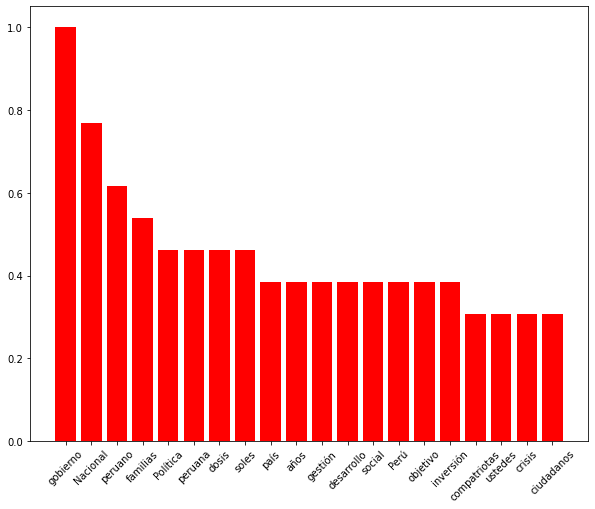

In [145]:
# fig = plt.figure(figsize=(10,8))
# plt.bar(wc.words_.keys(), wc.words_.values(), color='#FF0000')
# plt.xticks(rotation=45)
#plt.show()

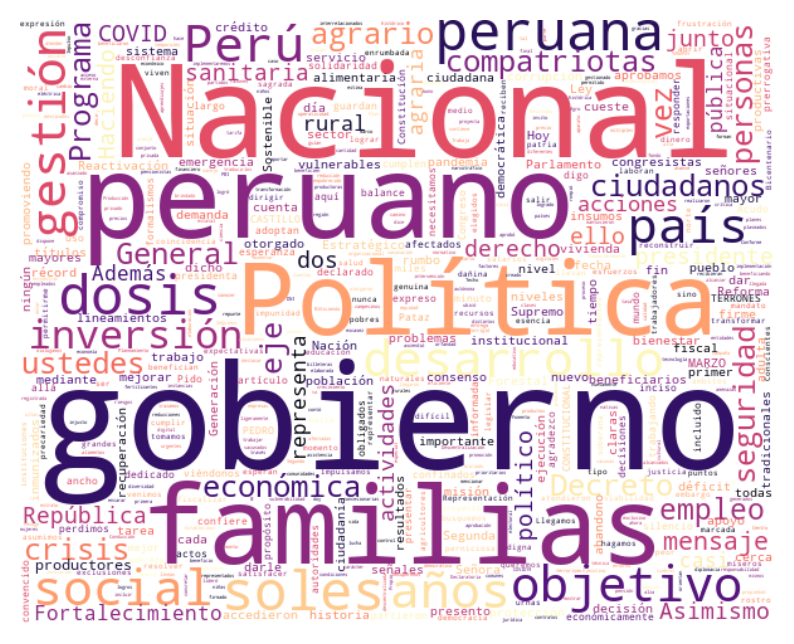

In [147]:
# Display the word cloud
fig = plt.figure(dpi=200)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

<Figure size 1200x800 with 0 Axes>

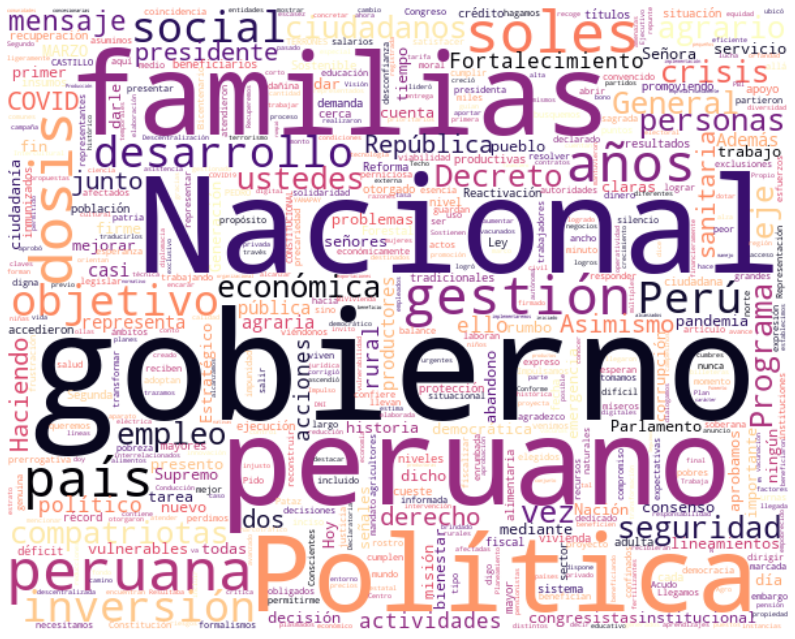

In [148]:
# re-generate the word cloud
wc.generate(data)

# display the cloud
fig = plt.figure(dpi=200)
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()